<a href="https://colab.research.google.com/github/chris-bhaila/PyTorch/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
#A model class that inherits nn.Module
class Model(nn.Module):
  #Input layer(4 features of the flower) --> Hidden Layer1(n no. of neurons)
  # --> H2(n) --> output(3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #instatiate nn.module
    self.fc1 = nn.Linear(in_features, h1) #fc -> Fully connected
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [7]:
#Manual seed for randomization
torch.manual_seed(55)
#Creation of an instance of model
model = Model()

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [16]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [19]:
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)
my_df

/tmp/ipython-input-3775887882.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [20]:
#train, test, split! Set x,y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [21]:
#Convert to numpy array
X = X.values
y = y.values

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [29]:
#Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [30]:
#Convert y labels to tensor long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [31]:
#Set the criterion of model to measure theh error, how far off the predictions
#are from the data
criterion = nn.CrossEntropyLoss()
#Choose Adam Optimizer, lr = learning rate(If error doesn't go down after
#a bunch of iterations, lower learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [37]:
#Train model
#Iterations? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) #Get predicted results

  #Measure the loss/error, will be high at first
  loss = criterion(y_pred, y_train) #predicted values vs the y_train

  #Keep track of losses
  losses.append(loss.detach().numpy())

  #Print every 10 epochs
  if i%10 == 0 :
    print(f'Epoch: {i} and loss; {loss}')

  #Backpropagation: take error rate of forward propagation and feed
  # it back thhru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss; 0.055778682231903076
Epoch: 10 and loss; 0.047570157796144485
Epoch: 20 and loss; 0.04199884831905365
Epoch: 30 and loss; 0.03791040927171707
Epoch: 40 and loss; 0.034740157425403595
Epoch: 50 and loss; 0.032185159623622894
Epoch: 60 and loss; 0.03006932884454727
Epoch: 70 and loss; 0.028278807178139687
Epoch: 80 and loss; 0.026737777516245842
Epoch: 90 and loss; 0.025392314419150352


Text(0.5, 0, 'Epoch')

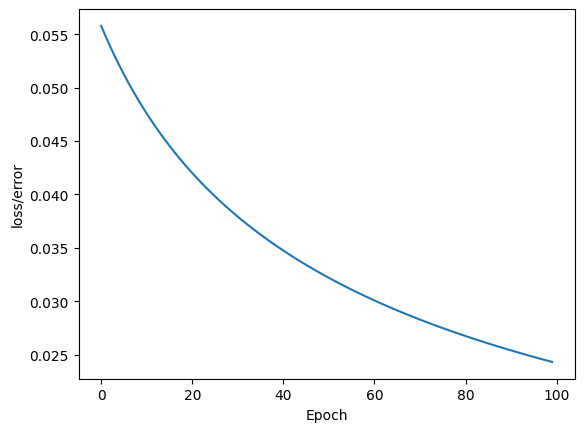

In [39]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [40]:
with torch.no_grad(): #turns off back propagation
  y_eval = model.forward(X_test) #X_test are features from out test_set, y_eval will be predictions
  loss = criterion(y_eval, y_test) #Find thhe loss or error


In [41]:
loss

tensor(0.1587)

In [45]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # tells us what type of flower class out network thinks it is
    print(f'{i+1}.) {str(y_val)} \t\t {y_test[i]}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1

  print(f'We got {correct} correct!')

1.) tensor([-10.2290,   3.2183,   7.3243]) 		 2
2.) tensor([-14.5529,   2.5982,  13.0893]) 		 2
3.) tensor([-15.3380,   3.3390,  12.9557]) 		 2
4.) tensor([-5.0207,  5.1219, -1.4050]) 		 1
5.) tensor([-12.8145,   3.4291,   9.9511]) 		 2
6.) tensor([-1.3758,  6.0631, -6.9353]) 		 1
7.) tensor([-9.4505,  3.8903,  5.4476]) 		 2
8.) tensor([-4.8769,  5.2885, -1.8149]) 		 1
9.) tensor([-11.1808,   3.6827,   7.7200]) 		 2
10.) tensor([-15.5523,   2.7814,  13.9764]) 		 2
11.) tensor([-9.1933,  3.9619,  5.0489]) 		 2
12.) tensor([ 18.9012,  11.3997, -37.8443]) 		 0
13.) tensor([ 17.2282,  10.3109, -34.3109]) 		 0
14.) tensor([ 0.6018,  5.6306, -8.5446]) 		 1
15.) tensor([ 15.7993,  10.4405, -32.9147]) 		 0
16.) tensor([-8.5819,  4.1614,  4.0598]) 		 2
17.) tensor([ 16.9519,  10.4532, -34.2435]) 		 0
18.) tensor([-10.1705,   3.4666,   6.8905]) 		 1
19.) tensor([ 18.2018,  10.9413, -36.3611]) 		 0
20.) tensor([ 15.3864,   9.4507, -30.9833]) 		 0
21.) tensor([-0.2802,  5.7652, -7.7408]) 		 1
22.)

In [49]:
new_iris = torch.tensor([4.7, 3.2, 7.3, 0.2])

In [50]:
with torch.no_grad():
  print(model(new_iris))

tensor([-13.5909,   2.0269,  12.6626])


In [51]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [52]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-10.8673,   3.3488,   7.8556])


In [55]:
#Save NN Model
torch.save(model.state_dict(), 'first_iris_model.pt')

In [56]:
#Load model
new_model = Model()
new_model.load_state_dict(torch.load('first_iris_model.pt'))

<All keys matched successfully>

In [57]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)